<a href="https://colab.research.google.com/github/SirOwss/sales_analysis_using_python_libraries/blob/main/sales_analysis_using_python_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing necessary libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Reading the data

In [ ]:
data = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding=('ISO-8859-1'),index_col=0)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#### Task 1: Basic Information about the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obj

### Data Cleaning

#### Task 2: Removing all the columns not revelant for this analysis to avoid confusion

In [ ]:
data.drop(['ORDERLINENUMBER','STATUS','PRODUCTCODE','PHONE','STATE',
           'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)
data.head(10)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NaN,NYC,USA,Small
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,NaN,Reims,France,Small
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,NaN,Paris,France,Medium
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,NaN,Pasadena,USA,Medium
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,NaN,San Francisco,USA,Medium
10168,36,96.66,3479.76,10/28/2003 0:00,4,10,2003,Motorcycles,95,Technics Stores Inc.,9408 Furth Circle,NaN,Burlingame,USA,Medium
10180,29,86.13,2497.77,11/11/2003 0:00,4,11,2003,Motorcycles,95,Daedalus Designs Imports,"184, chausse de Tournai",NaN,Lille,France,Small
10188,48,100.00,5512.32,11/18/2003 0:00,4,11,2003,Motorcycles,95,Herkku Gifts,"Drammen 121, PR 744 Sentrum",NaN,Bergen,Norway,Medium
10201,22,98.57,2168.54,12/1/2003 0:00,4,12,2003,Motorcycles,95,Mini Wheels Co.,5557 North Pendale Street,NaN,San Francisco,USA,Small


#### Task 3: Concatenating to 2 address columns with 1 cloumn having null values

In [ ]:
data["ADDRESS"] = data["ADDRESSLINE1"].fillna(' ') + "  " + data["ADDRESSLINE2"].fillna('')
data.drop(['ADDRESSLINE1','ADDRESSLINE2'], axis=1, inplace=True)
data.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,897 Long Airport Avenue
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small,59 rue de l'Abbaye
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,27 rue du Colonel Pierre Avia
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,78934 Hillside Dr.
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium,7734 Strong St.
10168,36,96.66,3479.76,10/28/2003 0:00,4,10,2003,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium,9408 Furth Circle
10180,29,86.13,2497.77,11/11/2003 0:00,4,11,2003,Motorcycles,95,Daedalus Designs Imports,Lille,France,Small,"184, chausse de Tournai"
10188,48,100.00,5512.32,11/18/2003 0:00,4,11,2003,Motorcycles,95,Herkku Gifts,Bergen,Norway,Medium,"Drammen 121, PR 744 Sentrum"
10201,22,98.57,2168.54,12/1/2003 0:00,4,12,2003,Motorcycles,95,Mini Wheels Co.,San Francisco,USA,Small,5557 North Pendale Street


#### Task 4: Converting ORDERDATE to pandas Datetime form

In [ ]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']).astype(np.int64)
data.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,
10107,30,95.70,2871.00,1046044800000000000,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,897 Long Airport Avenue
10121,34,81.35,2765.90,1052265600000000000,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small,59 rue de l'Abbaye
10134,41,94.74,3884.34,1057017600000000000,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,27 rue du Colonel Pierre Avia
10145,45,83.26,3746.70,1061769600000000000,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,78934 Hillside Dr.
10159,49,100.00,5205.27,1065744000000000000,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium,7734 Strong St.
10168,36,96.66,3479.76,1067299200000000000,4,10,2003,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium,9408 Furth Circle
10180,29,86.13,2497.77,1068508800000000000,4,11,2003,Motorcycles,95,Daedalus Designs Imports,Lille,France,Small,"184, chausse de Tournai"
10188,48,100.00,5512.32,1069113600000000000,4,11,2003,Motorcycles,95,Herkku Gifts,Bergen,Norway,Medium,"Drammen 121, PR 744 Sentrum"
10201,22,98.57,2168.54,1070236800000000000,4,12,2003,Motorcycles,95,Mini Wheels Co.,San Francisco,USA,Small,5557 North Pendale Street


#### Task 5: Looking for Missing and Duplicate values


In [ ]:
nan_df = data[data.isna().any(axis=1)]     # to find any null values
nan_df.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,


#### NO NULL VALUES FOUND

In [ ]:
data.duplicated( keep='first').sum()

0

#### NO DUPLICATE VALUES FOUND

In [ ]:
data.describe()  # to get basic statistical information of categorical data

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,3553.889072,1.084235e+18,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,1841.865106,1.992714e+16,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,482.130000,1.041811e+18,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,2203.430000,1.068120e+18,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,3184.800000,1.087258e+18,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,4508.000000,1.100693e+18,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,14082.800000,1.117498e+18,4.000000,12.000000,2005.00000,214.000000


## Data Analysis

### Q1: What is monthly sales of each financial year?

In [ ]:
monthly_sales = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_sales.head(16)

,YEAR_ID,MONTH_ID,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


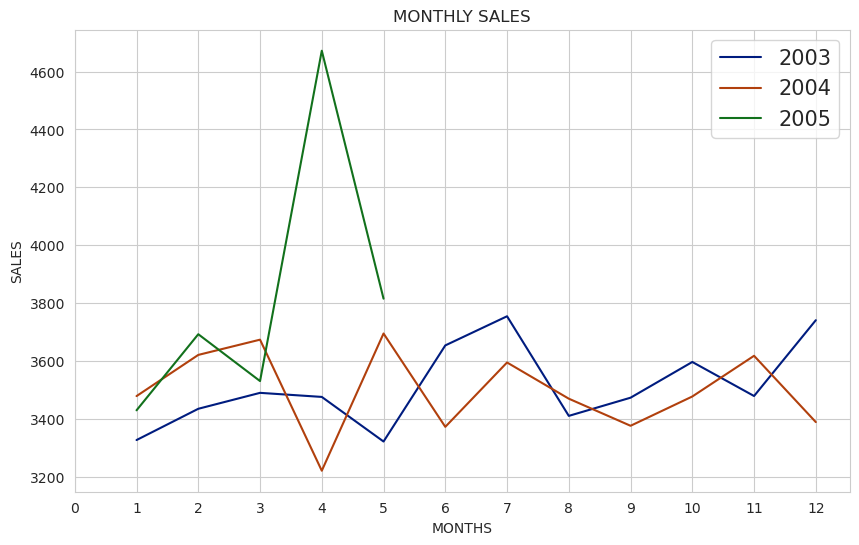

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

plt.title("MONTHLY SALES") # add title

a= sns.lineplot(x='MONTH_ID',y='SALES',data=data,hue='YEAR_ID',palette='dark',errorbar=None,)
sns.set_style('whitegrid') # add white grid behind

plt.xlabel('MONTHS')
plt.ylabel('SALES')
plt.legend(prop={'size': 15})  # adjust the legend size

a.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])    # to specifically adjust x-axis
plt.show()

### Observations:
 1) In 2003, month of May(5th) had the least amount of sales whereas month of July(7th) had best monthly sales
 2) In 2004, month of April(4th) had the least amount of sales whereas month of May(5th) had best monthly sales
 3) In 2005, month of January(1st) had the least amount of sales whereas month of April(4th) had best monthly sales
 4) This shows that during the summer season sales are high and just before the summer season sales the least

### Q2: What is the best year according to sales?

In [ ]:
yearly_sales=data.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
yearly_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


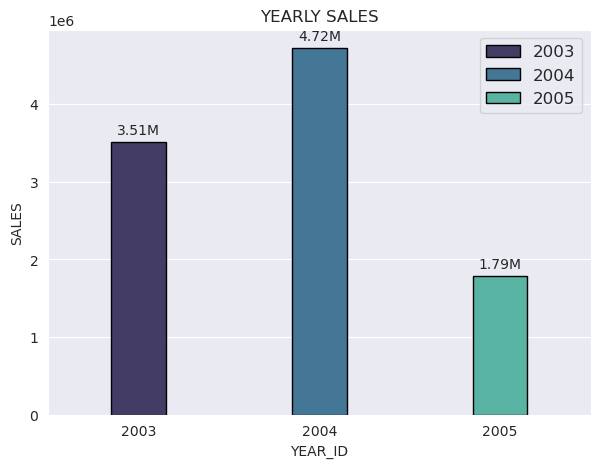

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(7,5))

plt.title("YEARLY SALES") # add title
plt.xlabel('YEARS')
plt.ylabel('SALES (IN MILLIONS)')

# main plotting of the bar chart
z= sns.barplot(x='YEAR_ID',y='SALES',data=yearly_sales,hue='YEAR_ID',palette='mako',edgecolor='black', dodge=False, width= 0.3)
sns.set_style('darkgrid')

# to add labels to each bar in the bar chart
tb = ['3.51M','4.72M','1.79M']
z.bar_label(z.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
z.bar_label(z.containers[1], labels=tb, padding=3)
z.bar_label(z.containers[2], labels=tb, padding=3)


# adjust the legend size
plt.legend(prop={'size': 12})
plt.show()

### Observations:
 1) In 2003, Sales were around 3.5 Million
 2) In 2004, Sales were around 4.7 Million
 3) In 2005, Sales were around 1.8 Million in just 5 months
 4) Representing Progressive growth in the Sales

### Q3: Which quarter is the best for each product line?

In [ ]:
quarter = data.groupby(['PRODUCTLINE']).QTR_ID.value_counts().reset_index(name='COUNTS')
quarter.head(8)

,PRODUCTLINE,QTR_ID,COUNTS
0,Classic Cars,4,392
1,Classic Cars,1,217
2,Classic Cars,3,183
3,Classic Cars,2,175
4,Motorcycles,4,117
5,Motorcycles,1,76
6,Motorcycles,2,74
7,Motorcycles,3,64


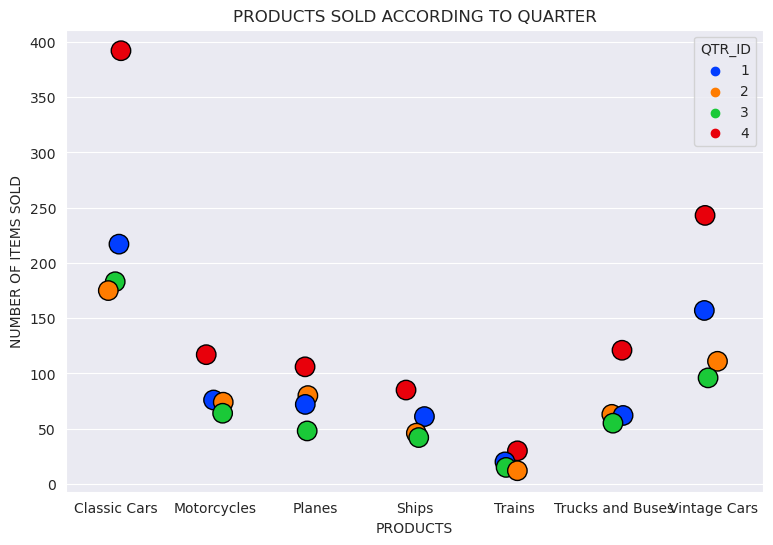

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(9,6))

kwargs  =   {'edgecolor':"black", 'linewidth':1} #applying colors to the edge dots

sns.stripplot(x='PRODUCTLINE',y='COUNTS',data=quarter,hue='QTR_ID',palette='bright',size=14,**kwargs)
sns.set_style('whitegrid') # Setting the background

plt.title("PRODUCTS SOLD ACCORDING TO QUARTER") # add title
plt.xlabel('PRODUCTS')
plt.ylabel('NUMBER OF ITEMS SOLD')
plt.show()

### Observations:
- In 4th quarter of the year all Products had maximum sales.
- The reason may be arrival of the Chirstmas holidays.

### Q4: What product sold the most? Why do you think it sold the most?

In [ ]:
products = data.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index()
price = data.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()   # MSRP = Manufacturer’s Suggested Retail Price
result=pd.merge(products,price)
result


,PRODUCTLINE,SALES,MSRP
0,Classic Cars,3919615.66,35
1,Motorcycles,1166388.34,40
2,Planes,975003.57,49
3,Ships,714437.13,54
4,Trains,226243.47,58
5,Trucks and Buses,1127789.84,54
6,Vintage Cars,1903150.84,33


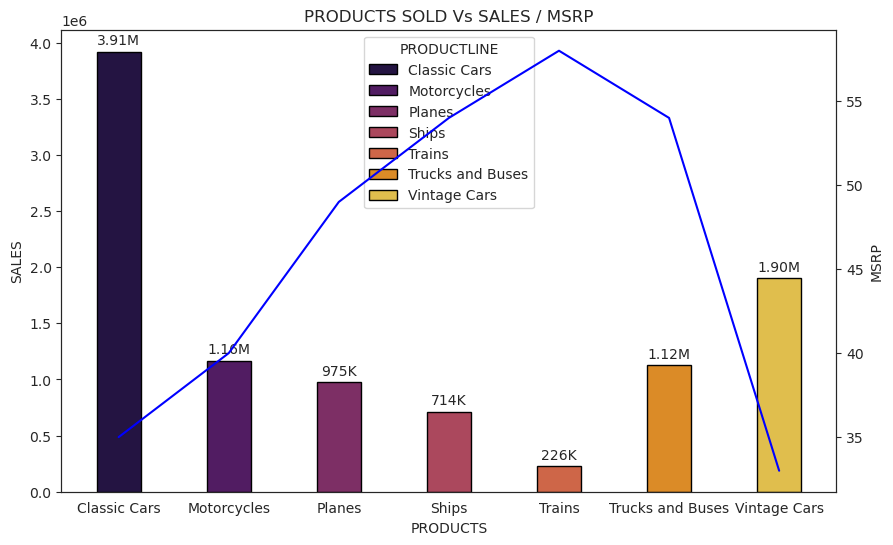

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

ax = sns.barplot(x='PRODUCTLINE',y='SALES',data=result,hue='PRODUCTLINE',palette='inferno',  # barplot
                 edgecolor='black',dodge=False, width= 0.4)
ax2 = plt.twinx()
sns.lineplot(x='PRODUCTLINE',y='MSRP',data=result,ax=ax2,errorbar=None,color= 'b')  # lineplot

tb = ['3.91M','1.16M','975K','714K','226K','1.12M','1.90M']
ax.bar_label(ax.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
ax.bar_label(ax.containers[1], labels=tb, padding=3)
ax.bar_label(ax.containers[2], labels=tb, padding=3)
ax.bar_label(ax.containers[3], labels=tb, padding=3)
ax.bar_label(ax.containers[4], labels=tb, padding=3)
ax.bar_label(ax.containers[5], labels=tb, padding=3)
ax.bar_label(ax.containers[6], labels=tb, padding=3)

sns.set_style('white')  # background
plt.title("PRODUCTS SOLD Vs SALES / MSRP") # add title
ax.set(xlabel='PRODUCTS')
plt.show()



### Observations:
 The above graph shows that the products with the lowest price were sold the most, whereas the products with a high price were the least popular.

### Q5: Who was the top customer?

In [ ]:
top_customer = data.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(5)
top_customer = top_customer[['SALES']].round(3)
top_customer.reset_index(inplace = True)
top_customer.head()

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90


/tmp/ipykernel_32/3739967314.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_yticklabels(["0","200K","400K","600K","800K"])


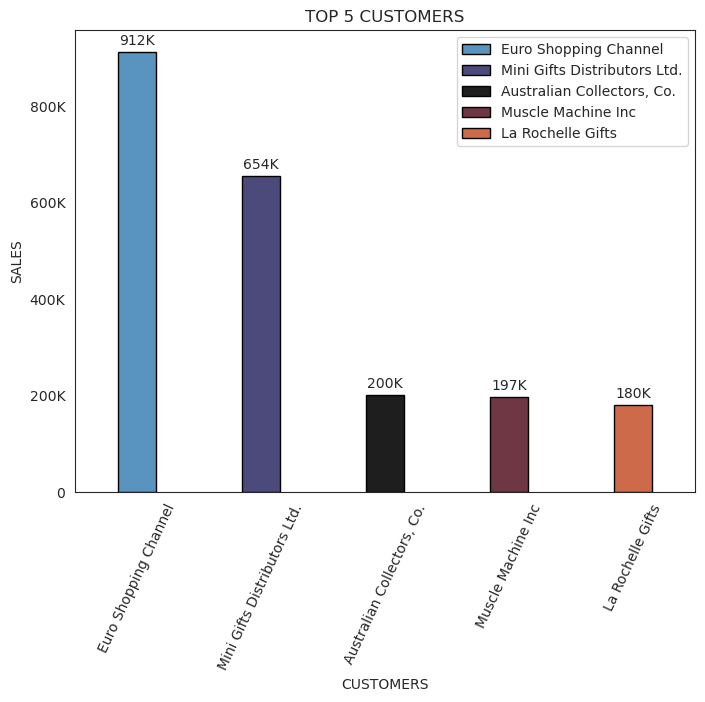

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(8,6))

# main plotting of the bar chart
z= sns.barplot(x='CUSTOMERNAME',y='SALES',data=top_customer,hue='CUSTOMERNAME',palette='icefire',
               edgecolor='black', dodge=False, width= 0.3)
sns.set_style('whitegrid')

plt.title("TOP 5 CUSTOMERS") # add title
z.set(xlabel='CUSTOMERS', ylabel='SALES')

# to add labels to each bar in the bar chart
tb = ['912K','654K','200K','197K','180K']
z.bar_label(z.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
z.bar_label(z.containers[1], labels=tb, padding=3)
z.bar_label(z.containers[2], labels=tb, padding=3)
z.bar_label(z.containers[3], labels=tb, padding=3)
z.bar_label(z.containers[4], labels=tb, padding=3)

# setting the ticks on both axis
plt.xticks(rotation=65)
z.set_yticklabels(["0","200K","400K","600K","800K"])

# adjust the legend size
plt.legend(prop={'size': 9})
plt.legend(loc='upper right')
plt.show()



### Observations:
 Clearly the Euro Shopping Channel was the top customer buying the most products

### Q6: Which country has the best sales?

In [ ]:
country = data.groupby(['COUNTRY'])['SALES'].sum().reset_index()
# country
short_form = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','IRL','ITA','JPN','NOR','PHL','SGP','ESP','SWE','CHE','GBR','USA']
country['iso_alpha'] = short_form
country

,COUNTRY,SALES,iso_alpha
0,Australia,630623.10,AUS
1,Austria,202062.53,AUT
2,Belgium,108412.62,BEL
3,Canada,224078.56,CAN
4,Denmark,245637.15,DNK
5,Finland,329581.91,FIN
6,France,1110916.52,FRA
7,Germany,220472.09,DEU
8,Ireland,57756.43,IRL
9,Italy,374674.31,ITA


In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(8,6))

# Choropleth map using Plotly
fig = px.choropleth(country,locations = 'iso_alpha', color = "SALES", scope = "world", hover_name = "COUNTRY")

# updating the Map by adding the title
fig.update_layout(
    title=dict(
        text="Countries according to their Sales ",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=0.9,
        pad={'b': 60}
    ),

)
fig.show()

<Figure size 800x600 with 0 Axes>

### Observations:
 USA had the best sales in the world followed by Spain and France.

### Q6: Which city has the best sales? Why?

In [ ]:
cities = data.groupby(['CITY'])['SALES'].sum().reset_index()
cities


,CITY,SALES
0,Aaarhus,100595.55
1,Allentown,122138.14
2,Barcelona,78411.86
3,Bergamo,137955.72
4,Bergen,111640.28
...,...,...
68,Toulouse,70488.44
69,Tsawassen,74634.85
70,Vancouver,75238.92
71,Versailles,64834.32


In [ ]:
cities = pd.read_csv('/kaggle/input/cities/cities.csv', encoding=('ISO-8859-1'),index_col=0)
cities       # Country names, latitudes, and Longitudes were added.

,CITY,SALES,iso_alpha,latitude,longitude
0,Aaarhus,100595.55,DNK,56.1629,10.2039
1,Allentown,122138.14,USA,40.6023,-75.4714
2,Barcelona,78411.86,ESP,41.3851,2.1734
3,Bergamo,137955.72,ITA,45.6983,9.6773
4,Bergen,111640.28,NOR,60.3913,5.3221
...,...,...,...,...,...
68,Toulouse,70488.44,FRA,43.6047,1.4442
69,Tsawassen,74634.85,CAN,49.0079,-123.0946
70,Vancouver,75238.92,CAN,49.2827,-123.1207
71,Versailles,64834.32,FRA,48.8014,2.1301


In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,16))

# Plotting Scatter map using Plotly
fig = px.scatter_geo(cities, lat='latitude', lon='longitude', color='iso_alpha',
                     hover_name='CITY', size='SALES',
                    )

# Adding title and centering it
fig.update_layout(
    title=dict(
        text="Cities according to their Sales ",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=0.9,
        pad={'b': 60}
    ),

)
fig.show()

<Figure size 1600x1600 with 0 Axes>

### Observations:
 City of Madrid had the best sales in the world followed by San Rafael and New York City.